## Acquisitions Dataset Exploratory Analysis ##

In [2]:
from LoadData import load_data
from forex_python.converter import CurrencyRates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the dataframes
dataframes = load_data()

# read in acquisitions dataframe
acq = dataframes['acquisitions']

### Explore descriptive statistics of the dataset and explore the price data ###

In [3]:
#print dataframe basic info
print(acq.head())
print(acq.tail())
print(acq.info())
print(acq.describe())
print(acq.columns)

# Check what currencies we are working with
print(acq['price_currency_code'].unique())
print(acq['price_amount'].isna().sum())

# Count nan in price_currency_code and price_amount
print(acq['price_currency_code'].isna().sum())

   id  acquisition_id acquiring_object_id acquired_object_id term_code   
0   1               1                c:11               c:10       NaN  \
1   2               7                c:59               c:72      cash   
2   3               8                c:24              c:132      cash   
3   4               9                c:59              c:155      cash   
4   5              10               c:212              c:215      cash   

   price_amount price_currency_code acquired_at   
0    20000000.0                 USD  2007-05-30  \
1    60000000.0                 USD  2007-07-01   
2   280000000.0                 USD  2007-05-01   
3   100000000.0                 USD  2007-06-01   
4    25000000.0                 USD  2007-07-01   

                                          source_url   
0  http://venturebeat.com/2007/05/30/fox-interact...  \
1  http://www.techcrunch.com/2007/07/02/deal-is-c...   
2  http://www.techcrunch.com/2007/05/30/cbs-acqui...   
3  http://techcrunch.com

- Acquisitions has 9562 rows and 12 columns ['id', 'acquisition_id', 'acquiring_object_id', 'acquired_object_id',
       'term_code', 'price_amount', 'price_currency_code', 'acquired_at',
       'source_url', 'source_description', 'created_at', 'updated_at'].
- There are multiple currencies used in the price_currency_code column, telling us this is international data. 
- Prices will need to be converted to one currency (USD) to normalize prices for analysis.

### Create a function for currency conversions based on the acquired_at column for currency conversion rates at time of acquisition ###

In [4]:
# convert acquired_at column to datetime for to enable conversions
acq['acquired_at'] = pd.to_datetime(acq['acquired_at'])

# Create columns price_amount_usd to standardize prices
# Create an instance of the CurrencyRates class
c = CurrencyRates()

def convert_to_usd(amount, currency, date):
    if pd.isna(amount) or pd.isna(currency) or pd.isna(date):
        return np.nan
    else:
        try:
            return c.convert(currency, 'USD', amount, date)
        except Exception:
            return np.nan

# Apply the conversion function to create a new 'price_amount_usd' column
acq['price_amount_usd'] = acq.apply(lambda x: convert_to_usd(x['price_amount'], x['price_currency_code'], x['acquired_at']), axis=1)

### Explore descriptive statistics of the price_amount_usd column we created ###

In [5]:
# Drop rows where 'price_amount_usd' is equal to 0
acq2 = acq.loc[acq['price_amount_usd'] != 0]

# Reset the index (if needed)
acq2.reset_index(drop=True, inplace=True)
# Basic statistics
print("Basic statistics of 'price_amount_usd' column:")
print("Minimum value:", acq2['price_amount_usd'].min())
print("Maximum value:", acq2['price_amount_usd'].max())
print("Mean value:", acq2['price_amount_usd'].mean())
print("Median value:", acq2['price_amount_usd'].median())
print("Standard deviation:", acq2['price_amount_usd'].std())

# Quartile information
print("\nQuartile information:")
print(acq2['price_amount_usd'].describe())

# Count of unique values
print("\nCount of unique values:")
print(acq2['price_amount_usd'].nunique())

# Top 10 most frequent values
print("\nTop 10 most frequent values:")
print(acq2['price_amount_usd'].value_counts().head(10))

Basic statistics of 'price_amount_usd' column:
Minimum value: 1.0
Maximum value: 2600000000000.0
Mean value: 1434619123.2337263
Median value: 54000000.0
Standard deviation: 51070355552.75662

Quartile information:
count    2.594000e+03
mean     1.434619e+09
std      5.107036e+10
min      1.000000e+00
25%      1.200000e+07
50%      5.400000e+07
75%      2.525000e+08
max      2.600000e+12
Name: price_amount_usd, dtype: float64

Count of unique values:
1157

Top 10 most frequent values:
price_amount_usd
10000000.0     44
30000000.0     38
50000000.0     37
20000000.0     36
100000000.0    30
25000000.0     26
40000000.0     25
15000000.0     25
150000000.0    22
60000000.0     21
Name: count, dtype: int64


- Dropped 0 values from price_amount_usd as it's unlikely these acquisitions occurred for free.
- Some data appears inaccurate as our max value is 2,600,000,000,000 (2.6 Trillion USD) and min is 1 (USD).
- Average: 1,434,619,123 (USD) and  Median: 54,000,000 (USD). Median is much more useful here as we have significant outliers that are potentially inaccurate.

### Visualize the distribution of price_amount_usd ###

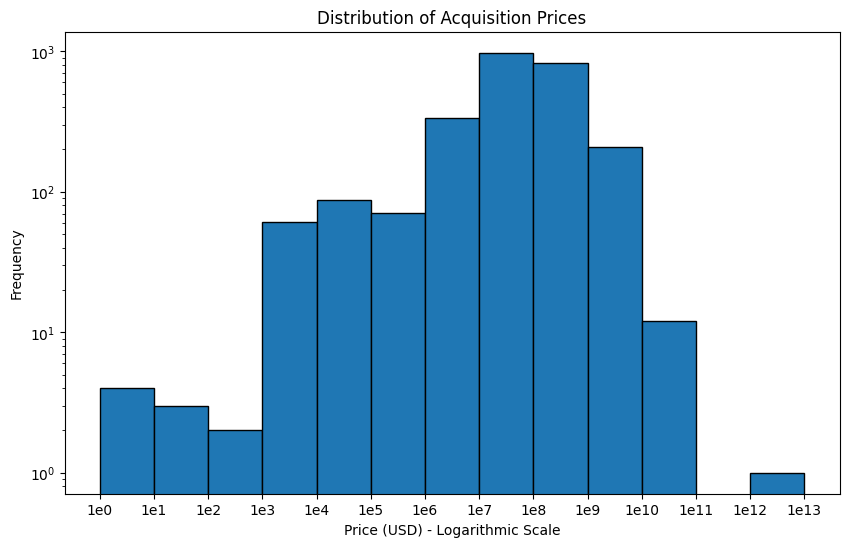

In [6]:
# Create a bar chart with logarithmic bins
plt.figure(figsize=(10, 6))
bins = 10 ** np.arange(0, np.log10(acq2['price_amount_usd'].max()) + 1)
plt.hist(acq2['price_amount_usd'], bins=bins, edgecolor='black', log=True)
plt.xscale('log')
plt.xticks(bins, labels=[f'1e{i}' for i in range(len(bins))])  # Set x-axis tick labels
plt.xlabel('Price (USD) - Logarithmic Scale')
plt.ylabel('Frequency')
plt.title('Distribution of Acquisition Prices')
plt.show()

### Visualize the term_code column to show what medium was used for these acquisitions ###

[nan 'cash' 'stock' 'cash_and_stock']
Number of NaN values in 'term_code' column: 7656


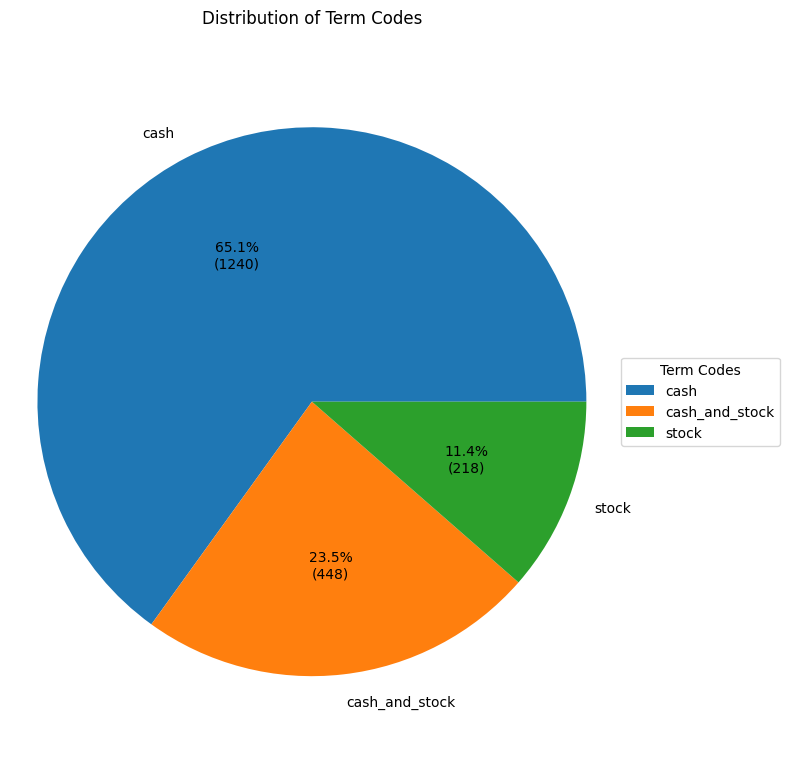

In [7]:
# See what values are in term_code
print(acq['term_code'].unique())

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'acq' and the column is 'term_code'

# Count NaN values in the 'term_code' column
nan_count = acq['term_code'].isna().sum()
print(f"Number of NaN values in 'term_code' column: {nan_count}")

# Count the occurrences of each term code excluding NaN values
term_code_counts = acq['term_code'].value_counts(dropna=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(term_code_counts, labels=term_code_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*term_code_counts.sum())})')
plt.title("Distribution of Term Codes")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Term Codes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### Initial takeaways from Acquisitions dataset ###
- Potential faulty data or error in conversion code as we have prices of acquisitions up to 2.6T (USD) and as low as 1 (USD).
    - If using acquisitions in further analysis will need to clean up data and account for outliers.
- 54,000,000 (USD) median value of acquisitions we have price data for.
- The vast majority of acquisitions took place using cash or cash and stock (88.6%), while only 11.4% took place using stock only.
    - This is for acquisitions we have term_code data for. Most acquisitions are missing this data (7656 out of 9562) or 80.07%.